<a href="https://colab.research.google.com/github/Samsriddhi/NYC-Traffic-Analysis/blob/main/NYC_Traffic_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Traffic Accident

![main](https://cdn-icons-png.flaticon.com/512/91/91684.png)

Everybody loves New York City. Nobody likes car accidents. Why bother look at the motor vehicle collision data? Well, reality is reality. Road safety is by any means a critical issue, and is relevant to everybody's daily life. It's inevitable, and more often than not, a life-or-death situation indeed. Therefore, it is very important to look at the past collision history data and see what we can learn from the data to help better prevent and/or avoid collisions in the future. Meanwhile, this is a fairly challenging/interesting data-science problem by itself, which hence becomes the core motivation of this project.

## Content

Looking at such a comprehensive data set, some interesting questions directly jumped into mind are:

How is the data look like on a map? Can we find particularly more dangerous/risky regions of concern? What their collision history data look like, can we get any useful insight?...

Especially for cases with walker injured/killed and the cases with people killed in general, are their distribution over location and/or time shows any significant different pattern/feature than the overall cases? Can we identify particular dangerous spots/areas for pedestrians, cyclists, or the lethal collisions, etc. ? ...

What are the top, say 20, most often seen collision causes and involved types of vehicles? What can learn from it? ...

## Source & Acknowledgements

Observations and advanced EDA can be accessed [here](https://toddwschneider.com/maps/nyc-motor-vehicle-collisions/) for your understanding. Another [site](https://nycdatascience.com/blog/student-works/new-york-city-motor-vehicle-collision-data-visualization/) explains the traffic accident data set in details. This [Kaggle post](https://www.kaggle.com/sveneschlbeck/basic-visualizations) introduces more EDA for references.

## Define Research Question

Predict the accident probability in new york city using regression models


## Data Introduction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Notice that this requires you to download the data form this [link](https://drive.google.com/file/d/1YMcGF1qXSLK7raPp89WVpGrIl6kc5Eq4/view?usp=sharing). Please download the data called *NYC-Accidents-2020*.

Once you download the *csv* format data set from the link above you can save it in your computer locally at a directory you desire. Please upload that data set onto Colab environment by going to the menu bar on the left and click on the *folder* button to open the directory of the notebook. Please directly upload your dataset to this Colab enrivonment and the path defined below should be working fine.

In [ ]:
path = "NYC-Accidents-2020.csv"
data = pd.read_csv(path)
data.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN
5,2020-08-29,03:29:00,NaN,NaN,40.682310,-73.844950,POINT (-73.84495 40.68231),WOODHAVEN BOULEVARD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4342721,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
6,2020-08-29,19:30:00,BRONX,10459.0,40.825226,-73.887780,POINT (-73.88778 40.825226),LONGFELLOW AVENUE,EAST 165 STREET,NaN,...,NaN,NaN,NaN,NaN,4343004,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
7,2020-08-29,00:00:00,NaN,NaN,40.800160,-73.935380,POINT (-73.93538 40.80016),2 AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4343342,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
8,2020-08-29,19:50:00,BRONX,10466.0,40.894314,-73.860270,POINT (-73.86027 40.894314),EAST 233 STREET,CARPENTER AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,4343030,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN
9,2020-08-29,09:20:00,QUEENS,11385.0,40.706780,-73.908880,POINT (-73.90888 40.70678),NaN,NaN,565 WOODWARD AVENUE,...,NaN,NaN,NaN,NaN,4343040,Sedan,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,34980.000000,49319.000000,49319.000000,53559.000000,53559.000000,53559.000000,53559.000000,53559.000000,53559.000000,53559.000000,53559.000000,5.355900e+04
mean,10915.986449,40.675132,-73.816914,0.395919,0.002185,0.051401,0.000766,0.054445,0.000149,0.290073,0.001270,4.316365e+06
std,509.758989,1.457045,2.641239,0.751333,0.049408,0.231064,0.027658,0.233065,0.012221,0.718559,0.038628,2.425889e+04
min,10000.000000,0.000000,-74.253006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.280000e+02
25%,10459.000000,40.666595,-73.956990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.303052e+06
50%,11210.000000,40.715170,-73.916550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.316468e+06
75%,11249.000000,40.796749,-73.864680,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.329870e+06
max,11697.000000,40.912884,0.000000,15.000000,3.000000,6.000000,1.000000,2.000000,1.000000,15.000000,3.000000,4.343622e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53559 entries, 0 to 53558
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     53559 non-null  object 
 1   CRASH TIME                     53559 non-null  object 
 2   BOROUGH                        34982 non-null  object 
 3   ZIP CODE                       34980 non-null  float64
 4   LATITUDE                       49319 non-null  float64
 5   LONGITUDE                      49319 non-null  float64
 6   LOCATION                       49319 non-null  object 
 7   ON STREET NAME                 39323 non-null  object 
 8   CROSS STREET NAME              24931 non-null  object 
 9   OFF STREET NAME                14236 non-null  object 
 10  NUMBER OF PERSONS INJURED      53559 non-null  int64  
 11  NUMBER OF PERSONS KILLED       53559 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  53559 non-null 

In [ ]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,VEHICLE TYPE CODE 5_E-Scooter,VEHICLE TYPE CODE 5_Motorcycle,VEHICLE TYPE CODE 5_Motorscooter,VEHICLE TYPE CODE 5_PK,VEHICLE TYPE CODE 5_Pick-up Truck,VEHICLE TYPE CODE 5_Sedan,VEHICLE TYPE CODE 5_Station Wagon/Sport Utility Vehicle,VEHICLE TYPE CODE 5_Taxi,VEHICLE TYPE CODE 5_Tractor Truck Diesel,VEHICLE TYPE CODE 5_Van
0,10466.0,40.892100,-73.833760,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11221.0,40.690500,-73.919914,2,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,NaN,40.816500,-73.946556,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10459.0,40.824720,-73.892960,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11203.0,40.649890,-73.933890,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53554,NaN,40.749336,-73.850150,3,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
53555,NaN,40.851690,-73.952380,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53556,NaN,40.789948,-73.942930,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53557,NaN,40.733685,-73.923960,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


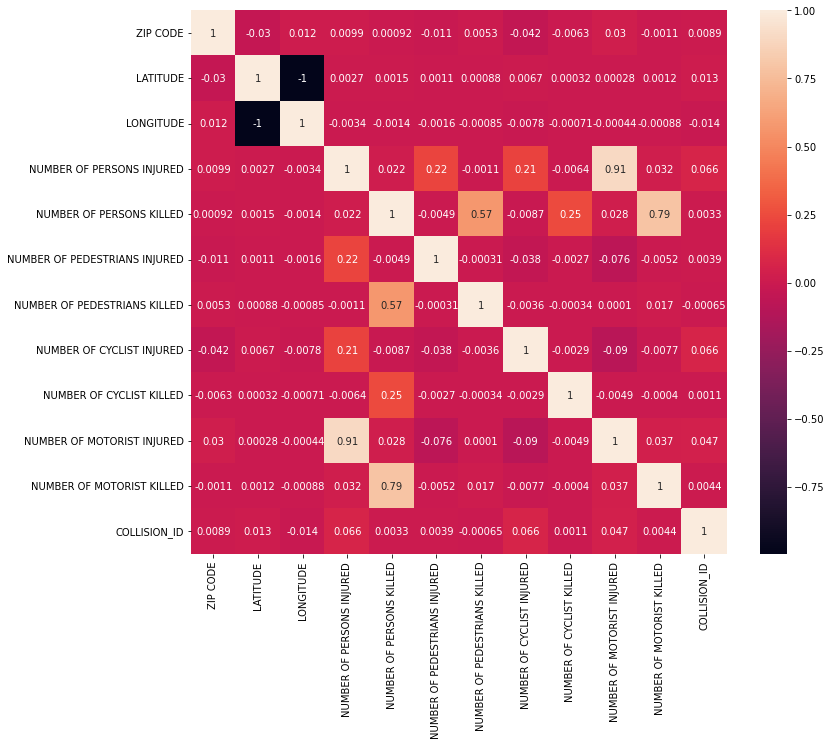

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

'''data['VEHICLE TYPE CODE 1']
data['VEHICLE TYPE CODE 3']'''

data['CRASH TIME']
hours = data['CRASH TIME'].str.split(":").str[0].astype(int) + data['CRASH TIME'].str.split(":").str[1].astype(float) / 60
data["HOUR"] = hours




data2 = pd.get_dummies(data)
data2

## EDA

Start with some basic things:
- View dimensions of dataset
- Preview the dataset
- View column names
- View statistical properties of dataset
- Check for missing values | if yes, how to clean up missing values?
- View the frequency distribution of values
- Missing values in categorical variables

1) Find the shape of your training and testing datasets (Hint: use the shape() function)

In [ ]:
# Your code here
data.shape

(53559, 30)

2) Plot a histogram of one of the columns you find interesting in the data frame. (Hint: Recall the *.hist()* method)

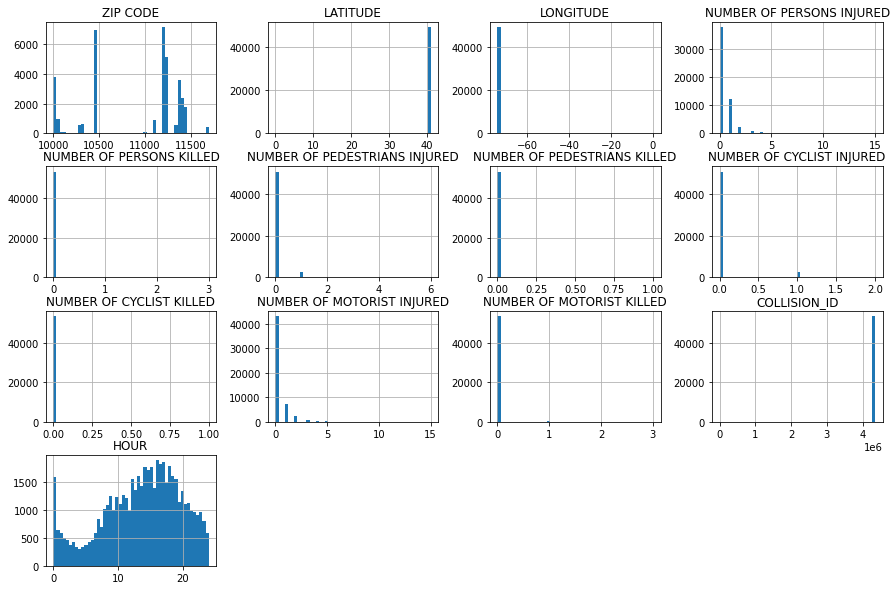

In [ ]:
# Your code here
import numpy as np  # for numerical operations
import pandas as pd  # for dataset operations
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(15,10))
plt.show()

3) Plot a scatter plot of two columns that you find interesting in the data frame. (Hint: Recall in *matplotlib.pyplot* there is the *.scatter* method)

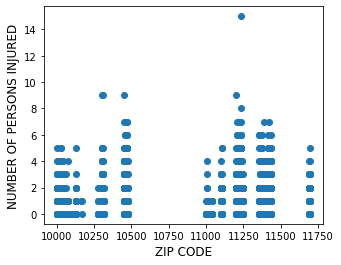

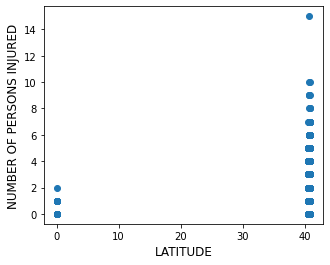

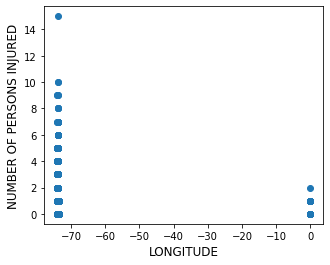

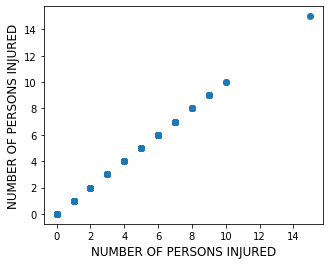

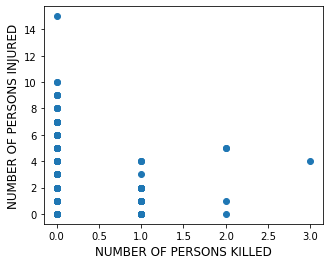

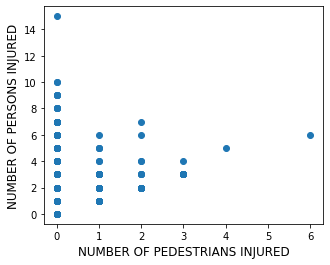

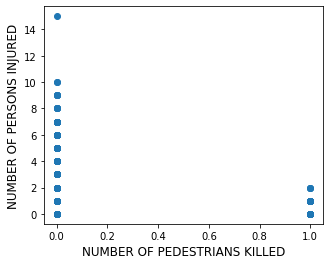

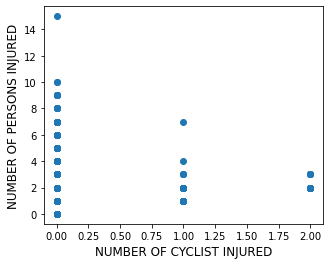

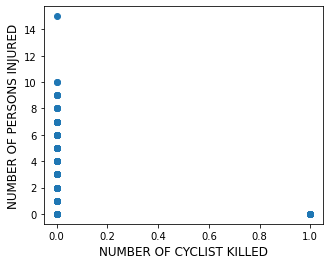

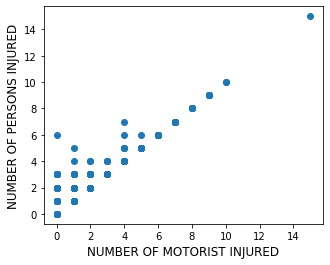

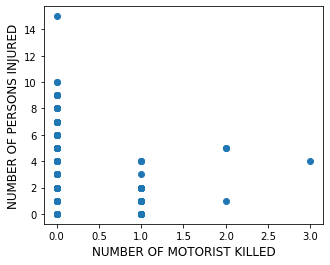

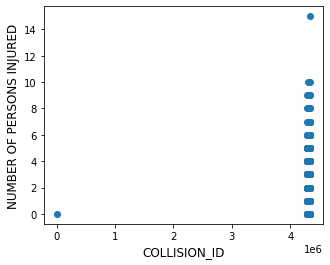

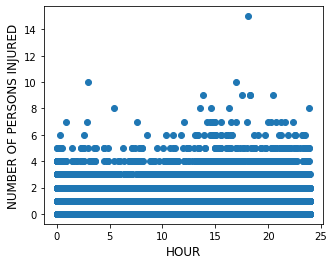

In [ ]:
# Your code here

'''for y in data.columns:
   X = (data['NUMBER OF PERSONS INJURED']) #reshaping will help our model fitting
   y = (data[y]) #reshaping will help our model fitting
   plt.scatter(X, y)
   plt.xlabel('NUMBER OF PERSONS INJURED')
   plt.ylabel(y)
   plt.show()'''

months = data['CRASH DATE'].str.split("-").str[1].astype(int)
data["CRASH DATE"]

for feature_name in (data.describe()).columns :
    plt.figure(figsize=(5, 4));
    plt.scatter( data[feature_name], data['NUMBER OF PERSONS INJURED']);
    plt.ylabel('NUMBER OF PERSONS INJURED', size=12);
    plt.xlabel(feature_name, size=12);

plt.show();

4) Try to think of one more step on your own here. What else would you like to know about the data or how it is arranged?

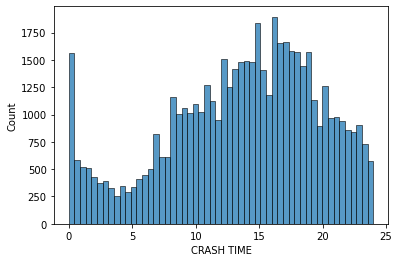

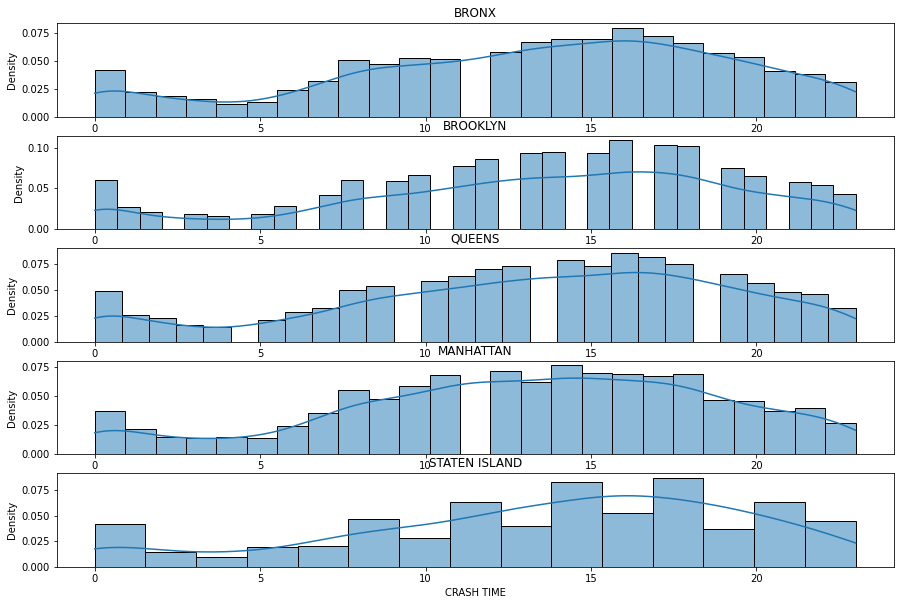

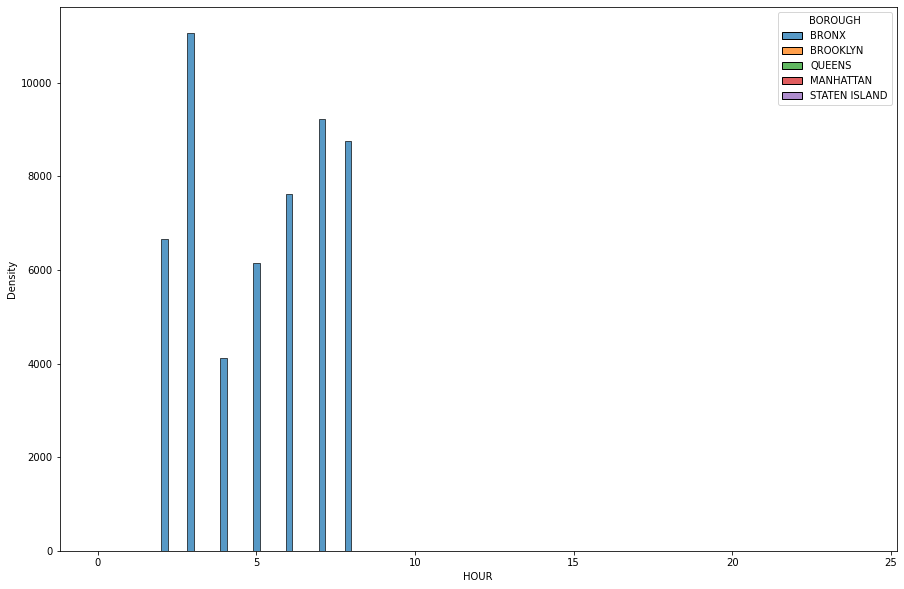

In [ ]:
# Your code here
'''data.replace("?", np.nan, inplace = True)
column_means = (data.describe()).mean()
data = (data.describe()).fillna(column_means)
#Check your data
data.head()

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(boston_df))
print(z)

threshold = 3
print(np.where(z > 3))

Q1 = (data.describe()).quantile(0.25)
Q3 =(data.describe()).quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(( data.describe()).columns < (Q1 - 1.5 * IQR)) |(( data.describe()).columns > (Q3 + 1.5 * IQR))

data_out = (( data.describe()).columns)[~((( data.describe()) < (Q1 - 1.5 * IQR)) |((( data.describe()).columns) > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape'''


sns.histplot(hours)
mask = data['BOROUGH'].isna()
boroughs = data[~mask]['BOROUGH'].unique()

plt.figure(figsize=(15,10))
i = 1
for borough in boroughs:
  mask2 = data['BOROUGH'] == borough
  hours = data[mask2]['CRASH TIME'].str.split(":").str[0].astype(int)
  plt.subplot(5,1,i)
  plt.title(borough)
  sns.histplot(hours, kde= True, stat="density")
  i = i+1
plt.figure(figsize=(15,10))
sns.histplot(data=data, x="HOUR", hue="BOROUGH", stat="density", multiple="stack")
data['BOROUGH'] == 'BRONX'
sns.histplot(months)

Text(0, 0.5, 'number of persons injured')

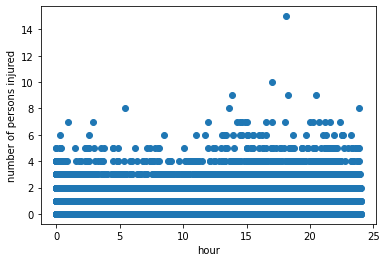

In [ ]:
plt.scatter(data["HOUR"], data['NUMBER OF PERSONS INJURED'])
plt.xlabel('hour')
plt.ylabel('number of persons injured')







ValueError: ignored

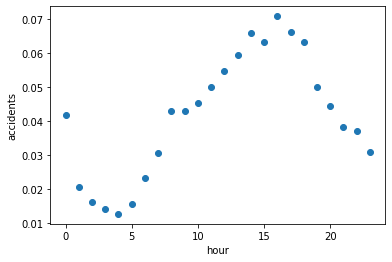

In [ ]:
y, x  = np.histogram(data['HOUR'], bins=24, range=(0, 24), density=True)
plt.scatter(x[:-1], y)
plt.xlabel('hour')
plt.ylabel('accidents')
plt.scatter(x, y)
plt.xlabel('accidents')
plt.ylabel('injuries')

Text(0, 0.5, 'number of pedestrians injured')

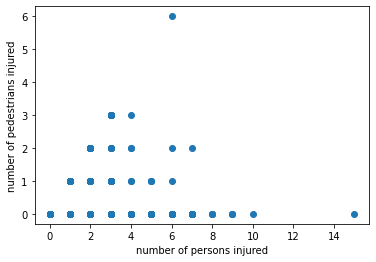

In [ ]:
plt.scatter(data["NUMBER OF PERSONS INJURED"], data['NUMBER OF PEDESTRIANS INJURED'])
plt.xlabel('number of persons injured')
plt.ylabel('number of pedestrians injured')

In [ ]:
'''plt.scatter(data["NUMBER OF PERSONS INJURED"], data['NUMBER OF MOTORIST INJURED'])
plt.xlabel('number of persons injured')
plt.ylabel('number of motorists injured')'''
data['accidents']

KeyError: ignored

## Baseline Model

Once you defined the explanatory variables and the outcome variables, you can go ahead and build a linear regression model as a baseline model.

In [ ]:

Y, X  = np.histogram(data['HOUR'], bins=48, range=(0, 24), density=True)
X = X[:-1]
X = X.reshape(-1, 1)
Y = Y.reshape(-1,1)

'''X = np.array(data['HOUR']).reshape(-1,1) # this is the explanatory variable (what we learn from)
Y = np.array(data['NUMBER OF PERSONS INJURED']).reshape(-1,1) # this is the target variable'''
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(X_train.shape, X_test.shape)'''
'''from sklearn.linear_model import LinearRegression
lm = LinearRegression() # builds up model package
lm.fit(X_train, y_train)'''

'from sklearn.linear_model import LinearRegression\nlm = LinearRegression() # builds up model package \nlm.fit(X_train, y_train)'

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR,HOUR^2,HOUR^3,HOUR^4,HOUR^5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Sedan,Sedan,NaN,NaN,NaN,0.000321,1.027257e-07,3.292447e-11,1.055257e-14,3.382190e-18
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0.000641,4.109029e-07,2.633958e-10,1.688412e-13,1.082301e-16
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN,0.000962,9.245315e-07,8.889607e-10,8.547585e-13,8.218722e-16
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Sedan,Sedan,NaN,NaN,NaN,0.001282,1.643612e-06,2.107166e-09,2.701459e-12,3.463363e-15


In [ ]:
'''# Create linear, quadratic, quintic versions of X
X_linear = X
#X_linear = X_linear[:-1]
X_linear = X_linear.reshape(-1, 1)

X_quadratic = np.concatenate((X_linear, Z),axis=1)
#X_quadratic = X_quadratic[:-1]
X_quadratic = X_quadratic.reshape(-1, 1)


X_biquad = np.concatenate((X_quadratic, B),axis=1)
#X_biquad= X_biquad[:-1]
X_biquad = X_biquad.reshape(-1, 1)

X_quintic = np.concatenate((X_linear, C),axis=1)
#X_quintic = X_quintic[:-1]
X_quintic = X_quintic.reshape(-1, 1)'''

X_linear = X
X_quadratic = np.concatenate((X_linear, X**2),axis=1)
X_cubic = np.concatenate((X_quadratic, X**3),axis=1)
X_quartic = np.concatenate((X_cubic, X**4),axis=1)
X_quintic = np.concatenate((X_quartic, X**5),axis=1)




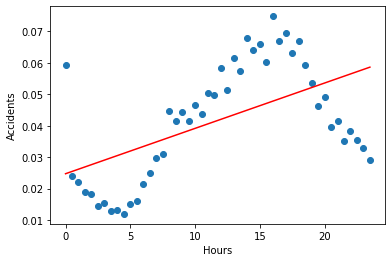

In [ ]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression() # builds up model package
lm.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, lm.predict(X), 'r')
plt.xlabel('Hours')
plt.ylabel('Accidents')
plt.show()



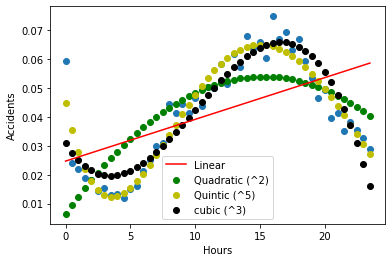

In [ ]:
# linear regression
lm1 = LinearRegression()
lm1.fit(X_linear, Y)

# quadratic regression
lm2 = LinearRegression()
lm2.fit(X_quadratic, Y)

lm4= LinearRegression()
lm4.fit(X_quartic, Y)

lm3= LinearRegression()
lm3.fit(X_cubic, Y)

# quintic regression
lm5 = LinearRegression()
lm5.fit(X_quintic, Y)

# scatterplot showing model
plt.scatter(X, Y)
plt.plot(X, lm1.predict(X_linear), c = 'r', label = 'Linear')
plt.scatter(X, lm2.predict(X_quadratic), c = 'g', label = "Quadratic (^2)")
plt.scatter(X, lm5.predict(X_quintic), c = 'y', label = 'Quintic (^5)')
plt.scatter(X, lm3.predict(X_cubic), c = 'black', label = 'cubic (^3)')
plt.xlabel('Hours')
plt.ylabel('Accidents')
plt.legend()
plt.show()

In [ ]:
# MSEs for each fit
from sklearn.metrics import mean_squared_error
print('MSE (in millions) for linear fit: ', mean_squared_error(Y, lm1.predict(X_linear))/1000000)
print('MSE (in millions) for quadratic (^2) fit: ', mean_squared_error(Y, lm2.predict(X_quadratic))/1000000)
print('MSE (in millions) for  biquad(^4) fit: ', mean_squared_error(Y, lm4.predict(X_quartic))/1000000)
print('MSE (in millions) for  quintic(^5) fit: ', mean_squared_error(Y, lm5.predict(X_quintic))/1000000)

MSE (in millions) for linear fit:  2.368706877304725e-10
MSE (in millions) for quadratic (^2) fit:  1.6118147940837676e-10
MSE (in millions) for  biquad(^4) fit:  2.5117313518337382e-11
MSE (in millions) for  quintic(^5) fit:  2.4744770629537903e-11


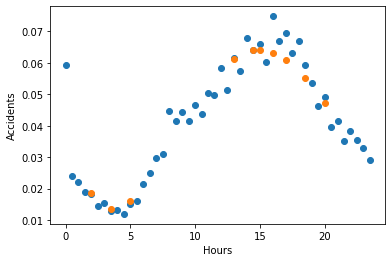

MSE (in millions) for quadratic (^2) fit after training:  1.4730448894315157e-11


"# Randomly split into train and test sets (20% of data in test set)\nX_train, X_test, Y_train, Y_test = train_test_split(X_quadratic, Y, test_size=0.2, random_state=0)\n\n# Reshape data for model fitting\nY_train = np.array(Y_train)\nY_test = np.array(Y_test)\nX_train = np.array(X_train)\nX_test = np.array(X_test)\n\nfrom sklearn.linear_model import LinearRegression\nlmr = LinearRegression() # builds up model package \nlmr.fit(X_train, Y_train)\nplt.scatter(X, Y)\nplt.plot(X_test, lm.predict(X_train), 'r')\nplt.xlabel('Hours')\nplt.ylabel('Accidents')\nplt.show()"

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_quartic, Y, test_size=0.2, random_state=0)
#lm2 = LinearRegression()
#lm2.fit(X_quadratic, Y)
lmr = LinearRegression() # builds up model package
lmr.fit(X_train, Y_train)

X_test_plot = X_test[:,0]
Y_pred = lmr.predict(X_test)

plt.scatter(X, Y)
plt.scatter(X_test_plot, Y_pred)
plt.xlabel('Hours')
plt.ylabel('Accidents')
plt.show()

print('MSE (in millions) for quadratic (^2) fit after training: ', mean_squared_error(Y_test, lm4.predict(X_test))/1000000)

'''# Randomly split into train and test sets (20% of data in test set)
X_train, X_test, Y_train, Y_test = train_test_split(X_quadratic, Y, test_size=0.2, random_state=0)

# Reshape data for model fitting
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

from sklearn.linear_model import LinearRegression
lmr = LinearRegression() # builds up model package
lmr.fit(X_train, Y_train)
plt.scatter(X, Y)
plt.plot(X_test, lm.predict(X_train), 'r')
plt.xlabel('Hours')
plt.ylabel('Accidents')
plt.show()'''

#mean_squared_error(Y, lmr.predict(X_test))/1000000)

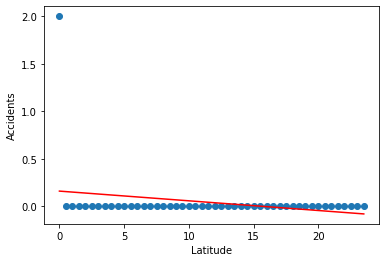

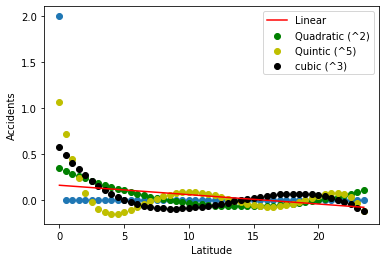

MSE (in millions) for linear fit:  7.66014739229025e-08
MSE (in millions) for quadratic (^2) fit:  6.894132653061224e-08
MSE (in millions) for  biquad(^4) fit:  4.918438529257862e-08
MSE (in millions) for  quintic(^5) fit:  3.897630532619417e-08


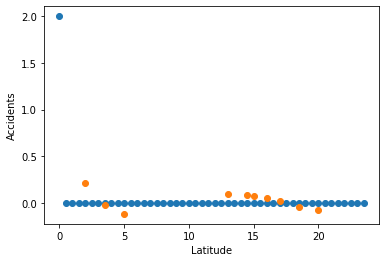

MSE (in millions) for quadratic (^2) fit after training:  8.022387851420937e-09


In [ ]:
Y, X  = np.histogram(data['LATITUDE'], bins=48, range=(0, 24), density=True)
X = X[:-1]
X = X.reshape(-1, 1)
Y = Y.reshape(-1,1)

X_linear = X
X_quadratic = np.concatenate((X_linear, X**2),axis=1)
X_cubic = np.concatenate((X_quadratic, X**3),axis=1)
X_quartic = np.concatenate((X_cubic, X**4),axis=1)
X_quintic = np.concatenate((X_quartic, X**5),axis=1)

from sklearn.linear_model import LinearRegression
lm = LinearRegression() # builds up model package
lm.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, lm.predict(X), 'r')
plt.xlabel('Latitude')
plt.ylabel('Accidents')
plt.show()

lm1 = LinearRegression()
lm1.fit(X_linear, Y)

# quadratic regression
lm2 = LinearRegression()
lm2.fit(X_quadratic, Y)

lm4= LinearRegression()
lm4.fit(X_quartic, Y)

lm3= LinearRegression()
lm3.fit(X_cubic, Y)

# quintic regression
lm5 = LinearRegression()
lm5.fit(X_quintic, Y)

# scatterplot showing model
plt.scatter(X, Y)
plt.plot(X, lm1.predict(X_linear), c = 'r', label = 'Linear')
plt.scatter(X, lm2.predict(X_quadratic), c = 'g', label = "Quadratic (^2)")
plt.scatter(X, lm5.predict(X_quintic), c = 'y', label = 'Quintic (^5)')
plt.scatter(X, lm3.predict(X_cubic), c = 'black', label = 'cubic (^3)')
plt.xlabel('Latitude')
plt.ylabel('Accidents')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
print('MSE (in millions) for linear fit: ', mean_squared_error(Y, lm1.predict(X_linear))/1000000)
print('MSE (in millions) for quadratic (^2) fit: ', mean_squared_error(Y, lm2.predict(X_quadratic))/1000000)
print('MSE (in millions) for  biquad(^4) fit: ', mean_squared_error(Y, lm4.predict(X_quartic))/1000000)
print('MSE (in millions) for  quintic(^5) fit: ', mean_squared_error(Y, lm5.predict(X_quintic))/1000000)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_quartic, Y, test_size=0.2, random_state=0)
#lm2 = LinearRegression()
#lm2.fit(X_quadratic, Y)
lmr = LinearRegression() # builds up model package
lmr.fit(X_train, Y_train)

X_test_plot = X_test[:,0]
Y_pred = lmr.predict(X_test)

plt.scatter(X, Y)
plt.scatter(X_test_plot, Y_pred)
plt.xlabel('Latitude')
plt.ylabel('Accidents')
plt.show()

print('MSE (in millions) for quartic (^2) fit after training: ', mean_squared_error(Y_test, lm4.predict(X_test))/1000000)

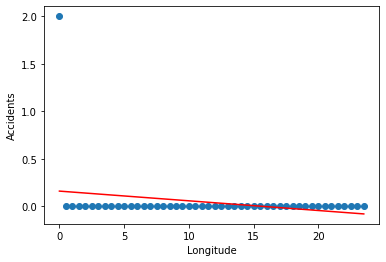

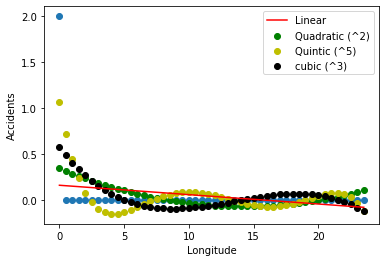

MSE (in millions) for linear fit:  7.66014739229025e-08
MSE (in millions) for quadratic (^2) fit:  6.894132653061224e-08
MSE (in millions) for  biquad(^4) fit:  4.918438529257862e-08
MSE (in millions) for  quintic(^5) fit:  3.897630532619417e-08


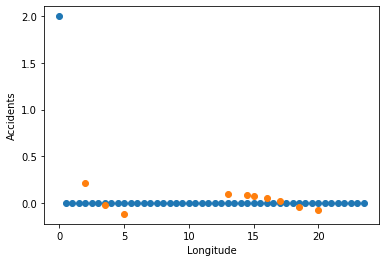

MSE (in millions) for  quartic (^2) fit after training:  8.022387851420937e-09


In [ ]:
Y, X  = np.histogram(data['LONGITUDE'], bins=48, range=(0, 24), density=True)
X = X[:-1]
X = X.reshape(-1, 1)
Y = Y.reshape(-1,1)

X_linear = X
X_quadratic = np.concatenate((X_linear, X**2),axis=1)
X_cubic = np.concatenate((X_quadratic, X**3),axis=1)
X_quartic = np.concatenate((X_cubic, X**4),axis=1)
X_quintic = np.concatenate((X_quartic, X**5),axis=1)

from sklearn.linear_model import LinearRegression
lm = LinearRegression() # builds up model package
lm.fit(X, Y)
plt.scatter(X, Y)
plt.plot(X, lm.predict(X), 'r')
plt.xlabel('Longitude')
plt.ylabel('Accidents')
plt.show()

lm1 = LinearRegression()
lm1.fit(X_linear, Y)

# quadratic regression
lm2 = LinearRegression()
lm2.fit(X_quadratic, Y)

lm4= LinearRegression()
lm4.fit(X_quartic, Y)

lm3= LinearRegression()
lm3.fit(X_cubic, Y)

# quintic regression
lm5 = LinearRegression()
lm5.fit(X_quintic, Y)

# scatterplot showing model
plt.scatter(X, Y)
plt.plot(X, lm1.predict(X_linear), c = 'r', label = 'Linear')
plt.scatter(X, lm2.predict(X_quadratic), c = 'g', label = "Quadratic (^2)")
plt.scatter(X, lm5.predict(X_quintic), c = 'y', label = 'Quintic (^5)')
plt.scatter(X, lm3.predict(X_cubic), c = 'black', label = 'cubic (^3)')
plt.xlabel('Longitude')
plt.ylabel('Accidents')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
print('MSE (in millions) for linear fit: ', mean_squared_error(Y, lm1.predict(X_linear))/1000000)
print('MSE (in millions) for quadratic (^2) fit: ', mean_squared_error(Y, lm2.predict(X_quadratic))/1000000)
print('MSE (in millions) for  biquad(^4) fit: ', mean_squared_error(Y, lm4.predict(X_quartic))/1000000)
print('MSE (in millions) for  quintic(^5) fit: ', mean_squared_error(Y, lm5.predict(X_quintic))/1000000)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_quartic, Y, test_size=0.2, random_state=0)
#lm2 = LinearRegression()
#lm2.fit(X_quadratic, Y)
lmr = LinearRegression() # builds up model package
lmr.fit(X_train, Y_train)

X_test_plot = X_test[:,0]
Y_pred = lmr.predict(X_test)

plt.scatter(X, Y)
plt.scatter(X_test_plot, Y_pred)
plt.xlabel('Longitude')
plt.ylabel('Accidents')
plt.show()

print('MSE (in millions) for  quartic (^2) fit after training: ', mean_squared_error(Y_test, lm4.predict(X_test))/1000000)

## Improved Model

For improved models, you can explore more advanced models such as neural network or even recurrent neural network.

## Tuning

Tuning is the process of maximizing a model's performance without overfitting or creating too high of a variance. In machine learning, this is accomplished by selecting appropriate “hyperparameters.” Hyperparameters can be thought of as the “dials” or “knobs” of a machine learning model.

## Performance Summary

Make a presentation of your result. You can refer to the syntax below.

Markdown | Preview
--- | ---
`**Model 1**` | **Model 2**
`*70%*` or `_italicized text_` | *90%*
`` `Monospace` `` | `Monospace`
`~~strikethrough~~` | ~~strikethrough~~
`[A link](https://www.google.com)` | [A link](https://www.google.com)
`![An image](https://www.google.com/images/rss.png)` | ![An image](https://www.google.com/images/rss.png)

More resources about creating tables in markdown of colab can be found [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk).

## Conclusion

- Does your model (baseline or advanced) answer the questions you are interested in?
- Does your EDA present the visual aid that you need to create the models?
- How can you improve your models if you have one more week of time before submission?